# imports..

In [2]:
from hdfs import InsecureClient

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Font Style

In [3]:
plt.style.use('default')

d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
fs = InsecureClient('http://bdata.iptime.org:9999', user='hadoop')
# fs = InsecureClient('http://namenode:9870', user='hadoop')

In [6]:
_path = '/user/hadoop/sports'
_csvs = ['9.8.21_신규사업자_현황_Ⅴ_지역__업태_2015_20250110122108.csv', '9.8.15_폐업자_현황_Ⅵ__지역__업태_2015_20250110122237.csv']
# 9.8.21_신규사업자_현황_Ⅴ_지역__업태_2015_20250110122108.csv
_data = []
for i, _csv in enumerate(_csvs):
    with fs.read(f'{_path}/{_csv}', encoding='utf-8') as reader:
        _data.append(pd.read_csv(reader))
        _data[i].columns = _data[i].columns.str.replace(r'\(\w*\)', '', regex=True)
    del _data[i]['업태별']
    _data[i].rename(columns={'시점':'year', '지역별':'region', '사업자별':'type', '데이터':'value'}, inplace=True)
    _data[i] = _data[i][_data[i]['type'].isin(['일반사업자', '간이사업자'])]

print(_data[0].columns, _data[1].columns)

_data[1].tail(10)

Index(['year', 'region', 'type', 'value'], dtype='object') Index(['year', 'region', 'type', 'value'], dtype='object')


,year,region,type,value
630,2023,경북,일반사업자,19655
631,2023,경북,간이사업자,15849
634,2023,부산,일반사업자,30689
635,2023,부산,간이사업자,20208
638,2023,울산,일반사업자,8958
639,2023,울산,간이사업자,6643
642,2023,경남,일반사업자,26953
643,2023,경남,간이사업자,20477
646,2023,제주,일반사업자,6832
647,2023,제주,간이사업자,5364


In [12]:
_years = list(_data[0]['year'].drop_duplicates())
print(_years[0])
xlabels = pd.period_range(start='2015', end='2023', freq='Y')
print(xlabels)

2015
PeriodIndex(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
             '2023'],
            dtype='period[A-DEC]')


In [13]:
plt0 = _data[0].groupby('year')['value'].sum().reset_index()
plt1 = _data[1].groupby('year')['value'].sum().reset_index()


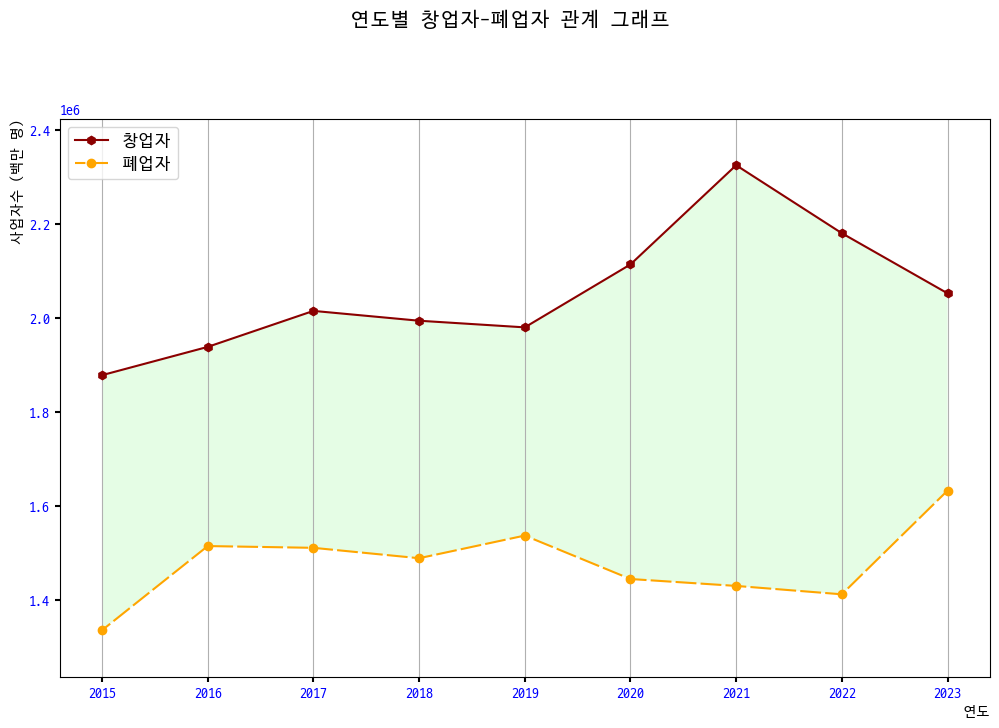

In [46]:
# _plt = _group_y.copy()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(plt0['year'], plt0['value'], linewidth=1.5, color='darkred', marker='h')
# ax1 = ax.twinx()
ax.plot(plt1['year'], plt1['value'], linewidth=1.5, color='orange', marker='o', linestyle=(5, (10, 2)))
# for a in ax.spines.keys():
#     ax.spines[a].set_visible(True)
ax.grid(axis='x')

# print(ax.get_yticks())
ax.tick_params(labelcolor='b', labelsize='medium', width=1.5)
fig.suptitle('연도별 창업자-폐업자 관계 그래프', fontsize='x-large')
ax.margins(y=0.1)
ax.set_box_aspect(0.6)
ax.fill_between(_years, plt1['value'], plt0['value'], alpha=0.25, facecolor='palegreen')
plt.xlabel('연도', loc='right')
plt.ylabel('사업자수 (백만 명)', loc='top')
plt.legend(['창업자', '폐업자'], loc='upper left', fontsize='large')
plt.savefig('image/businessperson.png')
plt.show()


In [30]:
plt2 = plt1.copy()
plt2['sub'] = plt0['value'] - plt1['value']
plt2['sub'] = plt2['sub'].map(lambda x: x/10000)
plt2['sub']

0    54.2790
1    42.3890
2    50.4228
3    50.5414
4    44.3070
5    66.9494
6    89.5294
7    76.8500
8    41.9926
Name: sub, dtype: float64

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.11/site-packages/matplotlib/pyplot.py'>

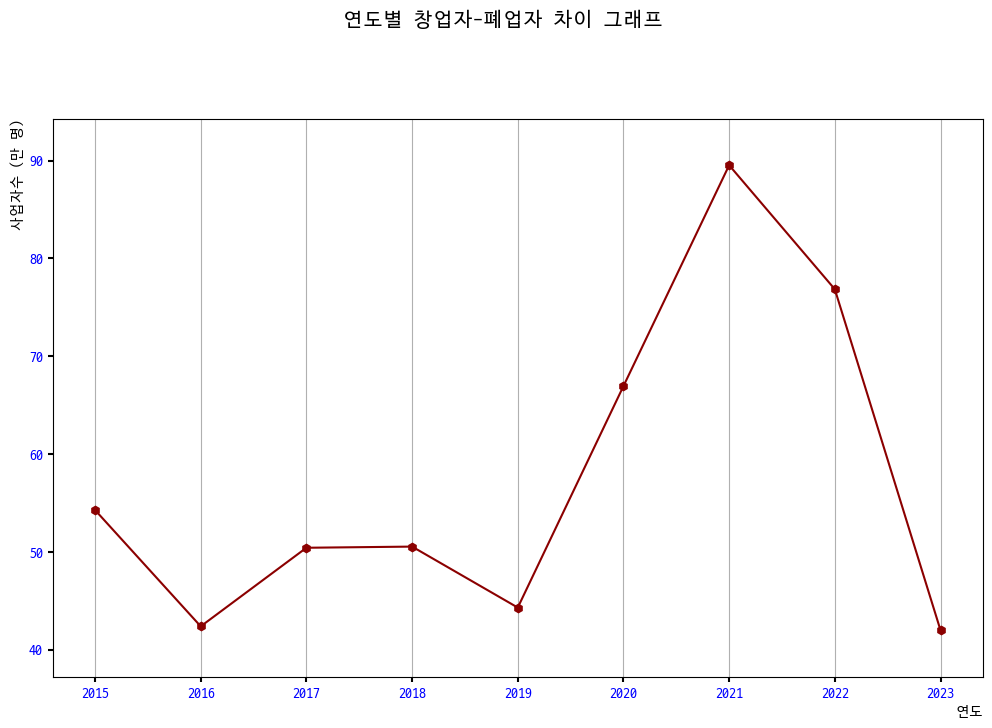

In [47]:
# _plt = _group_y.copy()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(plt2['year'], plt2['sub'], linewidth=1.5, color='darkred', marker='h')
# ax1 = ax.twinx()
# ax.plot(plt1['year'], plt1['value'], linewidth=1.5, color='orange', marker='o', linestyle=(5, (10, 2)))
# for a in ax.spines.keys():
#     ax.spines[a].set_visible(True)
ax.grid(axis='x')

ax.tick_params(labelcolor='b', labelsize='medium', width=1.5)
fig.suptitle('연도별 창업자-폐업자 차이 그래프', fontsize='x-large')
ax.margins(y=0.1)
ax.set_box_aspect(0.6)
# ax.fill_between(_years, plt1['value'], plt0['value'], alpha=0.25, facecolor='palegreen')
plt.xlabel('연도', loc='right')
plt.ylabel('사업자수 (만 명)', loc='top')
# plt.legend('')
plt.savefig('image/businessperson2.png')
plt